# BBC News Classification Project

## Project Overview

A Jupyter notebook with exploratory data analysis (EDA) procedure, model building and training, and comparison with supervised learning. 

### Author

Grant Novota

In [26]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# import the test and train data
training_data = pd.read_csv('learn-ai-bbc/BBC News Train.csv')
test_data = pd.read_csv('learn-ai-bbc/BBC News Test.csv')

First, let's inspect the data to understand its structure, missing values, and basic statistics. Then, we can visualize the data to get a better understanding of the distribution of classes and the length of the news articles. Finally, we'll clean the data by removing any unnecessary characters, converting all text to lowercase, and removing stop words.

   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
   ArticleId                                               Text       Category
0       1018  qpr keeper day heads for preston queens park r...          sport
1       1319  software watching while you work software that...           tech
2       1138  d arcy injury adds to ireland woe gordon d arc...       business
3        459  india s reliance family feud heats up the ongo...  entertainment
4       1020  boro suffer morrison injury blow middlesbrough...       politics
ArticleId    0
Text         0
Category     0
dtype: int64
ArticleId    0
Text     

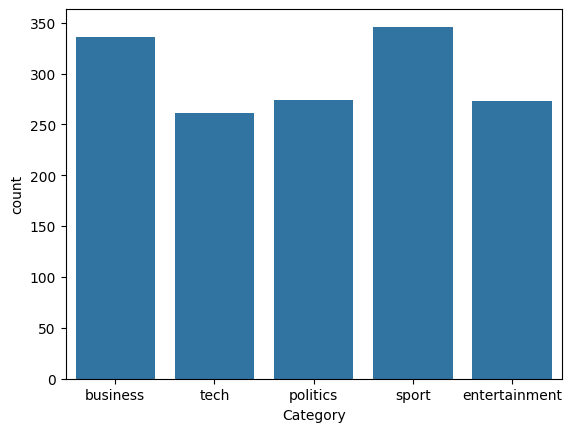

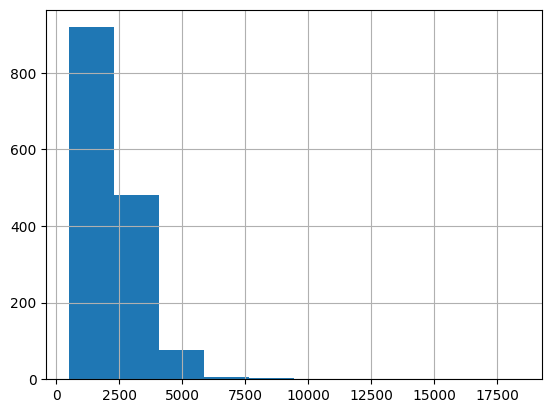

In [3]:
# Inspect the data
print(training_data.head())
print(test_data.head())

# Check for missing values
print(training_data.isnull().sum())
print(test_data.isnull().sum())

# Basic statistics
print(training_data.describe())
print(test_data.describe())

# Visualize the distribution of classes in the training data
sns.countplot(x='Category', data=training_data)
plt.show()

# Visualize the length of the news articles
training_data['Text'].str.len().hist()
plt.show()

# Clean the data
training_data['Text'] = training_data['Text'].str.replace('[^\w\s]','').str.lower()
test_data['Text'] = test_data['Text'].str.replace('[^\w\s]','').str.lower()

# Remove stop words and transform the text data into a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(training_data['Text'])
X_test = vectorizer.transform(test_data['Text'])

Based on this exploratory data analysis (EDA), the plan of analysis would be to convert the cleaned text data into a matrix of TF-IDF features, then use a matrix factorization method like NMF or LSA for dimensionality reduction or topic extraction. After that, we can use a classifier to predict the labels of the news articles.

In [12]:
# Number of components to keep. This means it will reduce the data to 100 features.
n_components = 100

svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

# Apply the pipeline
X_train_lsa = lsa.fit_transform(X_train)
X_test_lsa = lsa.fit_transform(X_test)

# Now, X_train_lsa and X_test_lsa are the transformed versions of X_train and X_test, respectively.

To measure the performance of the model, we first need to train a classifier on the transformed data. Let's use a simple logistic regression classifier for this purpose. After training the classifier, we can use accuracy, confusion matrix, etc., to inspect the performance.

In [17]:
# Create a logistic regression classifier
clf = LogisticRegression()

# Train the classifier
clf.fit(X_train_lsa, training_data['Category'])

# Predict the labels
train_preds = clf.predict(X_train_lsa)
test_preds = clf.predict(X_test_lsa)

# Calculate the accuracy
train_accuracy = accuracy_score(training_data['Category'], train_preds)
test_accuracy = accuracy_score(test_data['Category'], test_preds)

# Print the accuracies
print(f'Training accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')

# Print the confusion matrix for the training data
print('\nTraining data confusion matrix:')
print(confusion_matrix(training_data['Category'], train_preds))

# Print the confusion matrix for the test data
print('\nTest data confusion matrix:')
print(confusion_matrix(test_data['Category'], test_preds))

# Print the classification report for the training data
print('\nTraining data classification report:')
print(classification_report(training_data['Category'], train_preds))

# Print the classification report for the test data
print('\nTest data classification report:')
print(classification_report(test_data['Category'], test_preds))

Training accuracy: 0.978523489932886
Test accuracy: 0.2

Training data confusion matrix:
[[324   1   8   0   3]
 [  2 265   4   0   2]
 [  4   0 266   0   4]
 [  1   0   0 345   0]
 [  0   2   0   1 258]]

Test data confusion matrix:
[[39 19 35 23 31]
 [47 18 30 19 33]
 [41 11 34 27 34]
 [45 21 25 16 40]
 [39 23 21 24 40]]

Training data classification report:
               precision    recall  f1-score   support

     business       0.98      0.96      0.97       336
entertainment       0.99      0.97      0.98       273
     politics       0.96      0.97      0.96       274
        sport       1.00      1.00      1.00       346
         tech       0.97      0.99      0.98       261

     accuracy                           0.98      1490
    macro avg       0.98      0.98      0.98      1490
 weighted avg       0.98      0.98      0.98      1490


Test data classification report:
               precision    recall  f1-score   support

     business       0.18      0.27      0.22     

The output shows that the model has poor performance and is possibly overfitting the training data. To improve the test accuracy, we can try including regularization and cross-validation:

In [18]:
# Create a logistic regression classifier with regularization
clf = LogisticRegression(C=0.1)

# Train the classifier
clf.fit(X_train_lsa, training_data['Category'])

# Predict the labels
train_preds = clf.predict(X_train_lsa)
test_preds = clf.predict(X_test_lsa)

# Calculate the accuracy
train_accuracy = accuracy_score(training_data['Category'], train_preds)
test_accuracy = accuracy_score(test_data['Category'], test_preds)

# Print the accuracies
print(f'Training accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')

# Calculate and print cross-validated accuracy
cv_scores = cross_val_score(clf, X_train_lsa, training_data['Category'], cv=5)
print(f'Cross-validated accuracy: {np.mean(cv_scores)}')

# Print the confusion matrix for the training data
print('\nTraining data confusion matrix:')
print(confusion_matrix(training_data['Category'], train_preds))

# Print the confusion matrix for the test data
print('\nTest data confusion matrix:')
print(confusion_matrix(test_data['Category'], test_preds))

# Print the classification report for the training data
print('\nTraining data classification report:')
print(classification_report(training_data['Category'], train_preds))

# Print the classification report for the test data
print('\nTest data classification report:')
print(classification_report(test_data['Category'], test_preds))

Training accuracy: 0.9550335570469799
Test accuracy: 0.19727891156462585
Cross-validated accuracy: 0.9456375838926174

Training data confusion matrix:
[[321   1   9   0   5]
 [  6 252  10   3   2]
 [ 11   0 259   0   4]
 [  1   0   0 345   0]
 [  6   3   1   5 246]]

Test data confusion matrix:
[[48 16 24 31 28]
 [59 14 18 27 29]
 [47 12 28 35 25]
 [51 19 21 22 34]
 [49 19 18 28 33]]

Training data classification report:
               precision    recall  f1-score   support

     business       0.93      0.96      0.94       336
entertainment       0.98      0.92      0.95       273
     politics       0.93      0.95      0.94       274
        sport       0.98      1.00      0.99       346
         tech       0.96      0.94      0.95       261

     accuracy                           0.96      1490
    macro avg       0.96      0.95      0.95      1490
 weighted avg       0.96      0.96      0.96      1490


Test data classification report:
               precision    recall  f1-scor

To further improve the model or to understand how different hyperparameters affect the model's performance, we can perform a hyperparameter tuning. In the case of Logistic Regression, some of the hyperparameters we can tune are:

* C: Inverse of regularization strength. Smaller values specify stronger regularization.
* penalty: Used to specify the norm used in the penalization (e.g., 'l2').
* solver: Algorithm to use in the optimization problem (e.g., 'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga').

  param_C  mean_test_score  std_test_score  rank_test_score
0   0.001         0.399329        0.018623                6
1    0.01         0.730201        0.009153                5
2     0.1         0.945638        0.013820                4
3       1         0.965101        0.011350                2
4      10         0.967785        0.009864                1
5     100         0.960403        0.014457                3


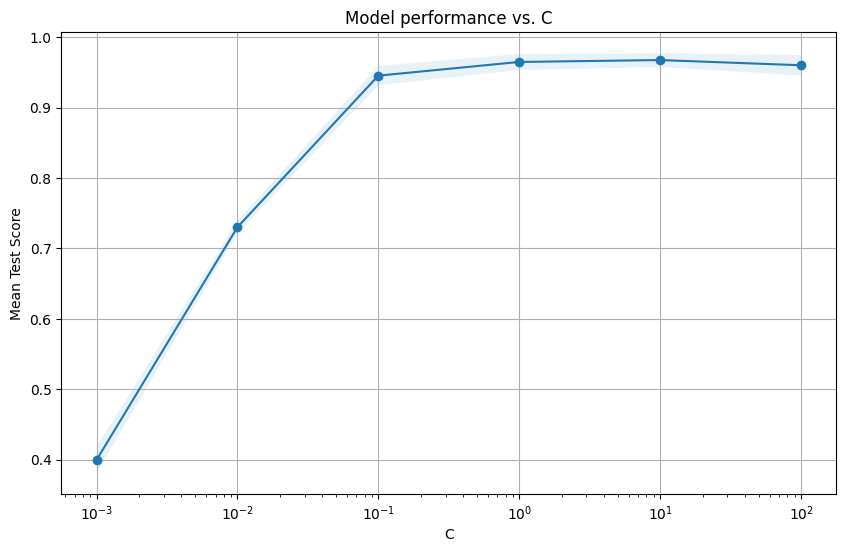

In [19]:
# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the model to the data
grid.fit(X_train_lsa, training_data['Category'])

# Create a DataFrame from the grid search results
results = pd.DataFrame(grid.cv_results_)

# Display the summary table
print(results[['param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']])

# Convert 'param_C' to a numeric type
results['param_C'] = pd.to_numeric(results['param_C'])

# Plot the mean test scores
plt.figure(figsize=(10, 6))
plt.plot(results['param_C'], results['mean_test_score'], marker='o')
plt.fill_between(results['param_C'], 
                 results['mean_test_score'] - results['std_test_score'], 
                 results['mean_test_score'] + results['std_test_score'], 
                 alpha=0.1)
plt.title('Model performance vs. C')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.xscale('log')
plt.grid(True)
plt.show()

Let's now pick and train a supervised learning method and compare the results:

In [20]:
# Define the parameter grid
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]}

# Create a GridSearchCV object
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)

# Fit the model to the data
grid_rf.fit(X_train_lsa, training_data['Category'])

# Predict on train and test data
train_preds_rf = grid_rf.predict(X_train_lsa)
test_preds_rf = grid_rf.predict(X_test_lsa)

# Calculate and print train and test accuracy
train_accuracy_rf = accuracy_score(training_data['Category'], train_preds_rf)
test_accuracy_rf = accuracy_score(test_data['Category'], test_preds_rf)

print(f"Train accuracy: {train_accuracy_rf}")
print(f"Test accuracy: {test_accuracy_rf}")

Train accuracy: 1.0
Test accuracy: 0.1891156462585034


In [21]:
# Define the fractions of training data to use
fractions = [0.1, 0.2, 0.5]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []

# Loop over the fractions
for fraction in fractions:
    # Sample a fraction of the training data
    sample = training_data.sample(frac=fraction, random_state=1)

    # Fit the model to the sampled data
    grid_rf.fit(X_train_lsa[sample.index], sample['Category'])

    # Predict on train and test data
    train_preds_rf = grid_rf.predict(X_train_lsa)
    test_preds_rf = grid_rf.predict(X_test_lsa)

    # Calculate and store train and test accuracy
    train_accuracies.append(accuracy_score(training_data['Category'], train_preds_rf))
    test_accuracies.append(accuracy_score(test_data['Category'], test_preds_rf))

for fraction, train_accuracy, test_accuracy in zip(fractions, train_accuracies, test_accuracies):
    print(f"Fraction: {fraction}")
    print(f"Train accuracy: {train_accuracy}")
    print(f"Test accuracy: {test_accuracy}")
    print()

Fraction: 0.1
Train accuracy: 0.9234899328859061
Test accuracy: 0.19183673469387755

Fraction: 0.2
Train accuracy: 0.9557046979865772
Test accuracy: 0.19047619047619047

Fraction: 0.5
Train accuracy: 0.9697986577181208
Test accuracy: 0.1945578231292517

